In [ ]:
import torch
print("PyTorch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())
print("CUDA version:", torch.version.cuda)
print("Device count:", torch.cuda.device_count())
print("GPU name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "N/A")


In [ ]:
import h5py

with h5py.File(r'C:\Users\Vivian\Documents\PANTHER\PANTHER\features\uniextracted_mag5x_patch224_fp\feats_h5\FA 47 B1.h5', 'r') as f:
    print(f.keys())               # should show 'features' and 'coords'
    print(f['coords'].shape)    # (N, D)
    print(f['coords'][:10])  # first 10 coordinates
    print(f['features'].shape)  # (N, C, H, W)


In [22]:
import torch

# Path to your .pt file
pt_path = r'C:\Users\Vivian\Documents\PANTHER\PANTHER\features\uniextracted_mag5x_patch224_fp\feats_pt\FA 47 B1.pt'

# Load the .pt file
data = torch.load(pt_path, map_location='cpu')

# Inspect contents
if isinstance(data, dict):
    print("Top-level keys:", list(data.keys()))
    for k, v in list(data.items())[:5]:  # print first 5 items
        print(f"\n🔑 Key: {k}")
        print(f"📦 Type: {type(v)}")
        if isinstance(v, torch.Tensor):
            print(f"🧩 Shape: {v.shape}")
            print(f"🔍 First 3 entries: {v.view(-1)[:3]}")
elif isinstance(data, torch.Tensor):
    print(f"📦 Loaded tensor of shape: {data.shape}")
    print(f"🔍 First 3 entries: {data.view(-1)[:3]}")
else:
    print("Loaded object type:", type(data))
    print("Sample value:", str(data)[:300])


📦 Loaded tensor of shape: torch.Size([2136, 1024])
🔍 First 3 entries: tensor([-2.0106,  1.6143, -0.7483])


reading test results

In [ ]:
import pickle

# Path to your .pkl file
pkl_path = r'C:\Users\Vivian\Documents\PANTHER\PANTHER\src\results\fa_vs_pt\k=0\FA_PT_panther\FA_PT_panther--25-07-04-18-49-12\test_results.pkl'
# pkl_path = r'C:\Users\Vivian\Documents\PANTHER\PANTHER\src\results\fa_vs_pt\k=0\FA_PT_2.5x_panther\FA_PT_2.5x_panther--25-07-21-17-04-49\test_results.pkl'
# Load the file
with open(pkl_path, 'rb') as f:
    data = pickle.load(f)

if isinstance(data, dict):
    for i, (k, v) in enumerate(data.items()):
        print(f"\n🔑 Key: {k}")
        if isinstance(v, (list, dict, tuple)):
            print(f"📦 Type: {type(v)}, Sample: {str(v)[:300]}")
        else:
            print(f"📦 Value: {v}")
        if i >= 4: break  # show only the first 5 entries


In [ ]:
import pickle

# Path to your .pkl file
# pkl_path = r'C:\Users\Vivian\Documents\PANTHER\PANTHER\src\results\fa_vs_pt\k=0\FA_PT_panther\FA_PT_panther--25-07-04-18-49-12\test_results.pkl'
# pkl_path = r'C:\Users\Vivian\Documents\PANTHER\PANTHER\src\splits\FA_PT_2.5x_k=0\prototypes\prototypes_c16_uniextracted_mag2.5x_patch224_fp_kmeans_num_1.0e+06.pkl'
pkl_path = r'C:\Users\Vivian\Documents\PANTHER\PANTHER\src\splits\FA_PT_2.5x_k=0\embeddings\uniextracted_mag2x_patch224_fp_PANTHER_embeddings_proto_16_allcat_em_None_eps_0.1_tau_None.pkl'
# Load the file


with open(pkl_path, 'rb') as f:
    data = pickle.load(f)

# Show top-level split keys
print("Available splits:", list(data.keys()))

for split_name in data:
    print(f"\n🔍 Split: {split_name}")
    for key in data[split_name]:
        print(f"  Key: {key}, Type: {type(data[split_name][key])}")
        try:
            sample = data[split_name][key]
            if isinstance(sample, (list, tuple)):
                print(f"    Sample value: {sample[0]}")
            elif isinstance(sample, torch.Tensor):
                print(f"    Tensor shape: {sample.shape}")
            elif isinstance(sample, np.ndarray):
                print(f"    Array shape: {sample.shape}")
            elif isinstance(sample, str):
                print(f"    Value: {sample}")
        except Exception as e:
            print(f"    [⚠️ Error printing sample]: {e}")


tsne for post-aggregation slide-level embeddings by class

In [ ]:
import pickle
import torch
import numpy as np
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt

# Load
pkl_path = r'C:\Users\Vivian\Documents\PANTHER\PANTHER\src\splits\FA_PT_2.5x_k=0\embeddings\uniextracted_mag2x_patch224_fp_PANTHER_embeddings_proto_16_allcat_em_None_eps_0.1_tau_None.pkl'
with open(pkl_path, 'rb') as f:
    data = pickle.load(f)

X = data['test']['X'].numpy()  # shape: [N, D]
y = data['test']['y'].numpy()  # shape: [N]

# UMAP
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
embeddings_2d = tsne.fit_transform(X)

# Plot by label
plt.figure(figsize=(8, 6))
sns.scatterplot(x=embeddings_2d[:, 0], y=embeddings_2d[:, 1], hue=y, palette="deep", s=20)
plt.title("t-SNE of Slide-Level Embeddings (Colored by Slide ID)")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.legend(title="Label")
plt.tight_layout()
plt.show()


tsne for post-aggregation slide-level embeddings by slide - can visualize per set (train, val, test) but dont have slide ids for train

c:\Users\Vivian\anaconda3\envs\panther\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


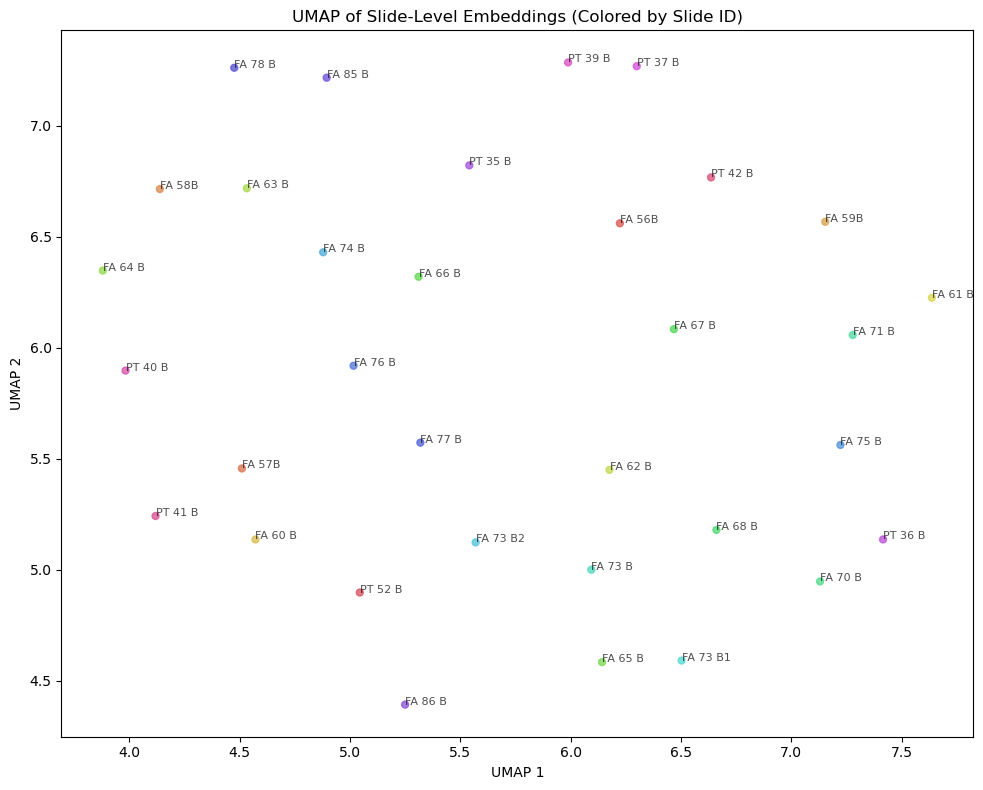

In [11]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns
import umap

# --------------------------
# Load post-aggregation embeddings
# --------------------------
pkl_path = r'C:\Users\Vivian\Documents\PANTHER\PANTHER\src\splits\FA_PT_2.5x_k=0\embeddings\uniextracted_mag2x_patch224_fp_PANTHER_embeddings_proto_16_allcat_em_None_eps_0.1_tau_None.pkl'

with open(pkl_path, 'rb') as f:
    embed_data = pickle.load(f)

X = embed_data['test']['X'].numpy()  # shape: [N, D]
y = embed_data['test']['y'].numpy()  # shape: [N]

# --------------------------
# Load sample IDs (slide names)
# --------------------------
with open(r'C:\Users\Vivian\Documents\PANTHER\PANTHER\src\results\fa_vs_pt\k=0\FA_PT_2.5x_panther\FA_PT_2.5x_panther--25-07-21-17-04-49\test_results.pkl', 'rb') as f:
    test_results = pickle.load(f)

slide_ids = test_results['sample_ids']  # shape: [N]

# --------------------------
# t-SNE (you can use UMAP too)
# --------------------------
# tsne = TSNE(n_components=2, perplexity=30, random_state=42)
# embeddings_2d = tsne.fit_transform(X)


# use UMAP instead of t-SNE
reducer = umap.UMAP(n_components=2, random_state=42)
proto_umap = reducer.fit_transform(X)  # Uncomment if you want to use UMAP instead of t-SNE
embeddings_2d = proto_umap  # Use UMAP embeddings

# --------------------------
# Assign unique color to each slide
# --------------------------
unique_slides = np.unique(slide_ids)
palette = sns.color_palette("hls", len(unique_slides))
slide_to_color = {sid: palette[i] for i, sid in enumerate(unique_slides)}
colors = [slide_to_color[sid] for sid in slide_ids]

# --------------------------
# Plot with legend
# --------------------------
# plt.figure(figsize=(10, 8))
# scatter = plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=colors, s=25, alpha=0.8)

# # Legend
# for sid in unique_slides:
#     plt.scatter([], [], c=[slide_to_color[sid]], label=sid)
# plt.legend(title='Slide ID', bbox_to_anchor=(1.05, 1), loc='upper left', markerscale=2)

# plt.title("t-SNE of Slide-Level Embeddings (Colored by Slide ID)")
# plt.xlabel("t-SNE 1")
# plt.ylabel("t-SNE 2")
# plt.tight_layout()
# plt.show()

# plot with slide IDs annotated
plt.figure(figsize=(10, 8))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=colors, s=25, alpha=0.8)

for i in range(len(slide_ids)):
    plt.text(embeddings_2d[i, 0], embeddings_2d[i, 1], slide_ids[i],
             fontsize=8, alpha=0.7)

# plt.title("t-SNE of Slide-Level Embeddings (Colored by Slide ID)")
# plt.xlabel("t-SNE 1")
# plt.ylabel("t-SNE 2")

# umap labels
plt.title("UMAP of Slide-Level Embeddings (Colored by Slide ID)")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.tight_layout()
plt.show()


t-sne of prototype vectors

(1, 16, 1024)


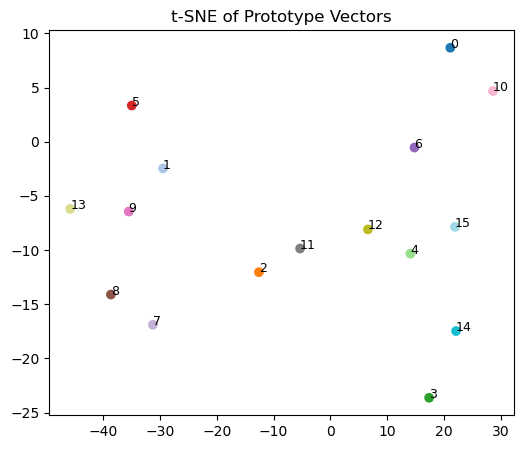

In [17]:
import pickle
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

pkl_path = r'C:\Users\Vivian\Documents\PANTHER\PANTHER\src\splits\FA_PT_k=0\prototypes\prototypes_c16_uni_kmeans_num_1.0e+06.pkl'

# Load prototype dictionary
with open(pkl_path, 'rb') as f:
    proto_dict = pickle.load(f)

# Access and squeeze the prototype array
prototypes = proto_dict['prototypes']  # shape: [1, n_prototypes, D]
print(prototypes.shape)  # debugging
prototypes = np.squeeze(prototypes)    # shape: [n_prototypes, D]

tsne = TSNE(n_components=2, perplexity=5, random_state=42)
proto_tsne = tsne.fit_transform(prototypes)

# Plot
plt.figure(figsize=(6, 5))
plt.scatter(proto_tsne[:, 0], proto_tsne[:, 1], c=range(prototypes.shape[0]), cmap='tab20')
plt.title("t-SNE of Prototype Vectors")
for i, (x, y) in enumerate(proto_tsne):
    plt.text(x, y, str(i), fontsize=9)
plt.show()


c:\Users\Vivian\anaconda3\envs\panther\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


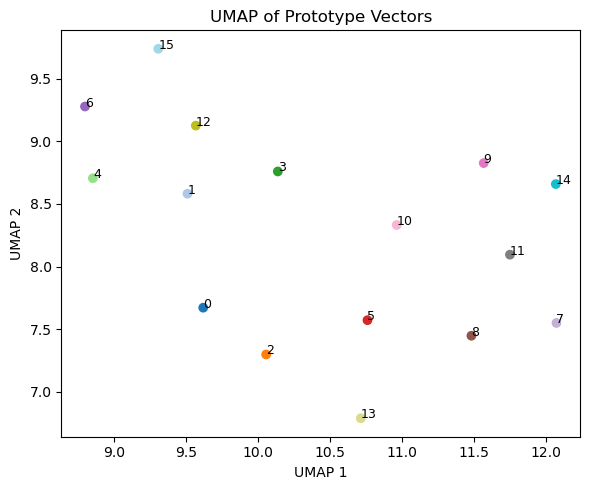

In [10]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import umap

pkl_path = r'C:\Users\Vivian\Documents\PANTHER\PANTHER\src\splits\FA_PT_10x_k=0\prototypes\prototypes_c16_uniextracted_mag10x_patch224_fp_kmeans_num_1.0e+06.pkl'


# Load prototypes
with open(pkl_path, 'rb') as f:
    proto_dict = pickle.load(f)

prototypes = np.squeeze(proto_dict['prototypes'])  # (n_prototypes, d)

# Run UMAP without `ensure_all_finite`
reducer = umap.UMAP(n_components=2, random_state=42)
proto_umap = reducer.fit_transform(prototypes)

# Plot
plt.figure(figsize=(6, 5))
plt.scatter(proto_umap[:, 0], proto_umap[:, 1], c=range(prototypes.shape[0]), cmap='tab20')
plt.title("UMAP of Prototype Vectors")
for i, (x, y) in enumerate(proto_umap):
    plt.text(x, y, str(i), fontsize=9)
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.tight_layout()
plt.show()


In [ ]:
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# -----------------------------
# Settings
# -----------------------------
h5_dir = r'C:\Users\Vivian\Documents\CLAM\CLAM\FEATURES_DIR_5x\FEATURES_DIR_10x\uni\h5_files'
label_map = {'FA': 0, 'PT': 1}  # Map based on prefix in filename
max_patches_per_slide = 200  # Optionally limit patches per slide to balance

# -----------------------------
# Load all features and labels
# -----------------------------
all_features = []
all_labels = []

for fname in os.listdir(h5_dir):
    if not fname.endswith('.h5'):
        continue
    
    label_str = fname.split()[0]  # e.g., 'FA' from 'FA 47 B1.h5'
    label = label_map.get(label_str, None)
    if label is None:
        continue

    with h5py.File(os.path.join(h5_dir, fname), 'r') as f:
        feats = f['features'][:]
        
        # Limit number of patches per slide to avoid imbalance
        if len(feats) > max_patches_per_slide:
            idx = np.random.choice(len(feats), max_patches_per_slide, replace=False)
            feats = feats[idx]

        all_features.append(feats)
        all_labels.extend([label] * len(feats))

# Stack everything
all_features = np.vstack(all_features)
all_labels = np.array(all_labels)

print(f"Total patches: {len(all_labels)}")
print(f"Feature shape: {all_features.shape}")  # Should be (N, 1024)

# -----------------------------
# t-SNE
# -----------------------------
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
features_2d = tsne.fit_transform(all_features)

# -----------------------------
# Plot
# -----------------------------
plt.figure(figsize=(10, 8))
scatter = plt.scatter(features_2d[:, 0], features_2d[:, 1], c=all_labels, cmap='coolwarm', alpha=0.6)
plt.legend(*scatter.legend_elements(), title="Class (0=FA, 1=PT)")
plt.title("t-SNE projection of patch-level embeddings")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()


visualizing clusters by slide

In [27]:
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# -----------------------------
# Settings
# -----------------------------
h5_dir = r'C:\Users\Vivian\Documents\CLAM\CLAM\FEATURES_DIR_5x\FEATURES_DIR_10x\uniextracted_mag10x_patch224_fp\feats_h5'
label_map = {'FA': 0, 'PT': 1}  # Map based on prefix in filename
max_patches_per_slide = 200  # Optionally limit patches per slide to balance

# -----------------------------
# Load all features, labels, slide IDs
# -----------------------------
all_features = []
all_labels = []
slide_ids = []

for fname in os.listdir(h5_dir):
    if not fname.endswith('.h5'):
        continue

    label_str = fname.split()[0]  # e.g., 'FA' from 'FA 47 B1.h5'
    label = label_map.get(label_str, None)
    if label is None:
        continue

    slide_id = fname.replace('.h5', '')

    with h5py.File(os.path.join(h5_dir, fname), 'r') as f:
        feats = f['features'][:]
        
        # Limit number of patches per slide
        if len(feats) > max_patches_per_slide:
            idx = np.random.choice(len(feats), max_patches_per_slide, replace=False)
            feats = feats[idx]
        
        all_features.append(feats)
        all_labels.extend([label] * len(feats))
        slide_ids.extend([slide_id] * len(feats))  # 👈 Add slide_id per patch

# Stack everything
all_features = np.vstack(all_features)
all_labels = np.array(all_labels)
slide_ids = np.array(slide_ids)

print(f"Total patches: {len(all_labels)}")
print(f"Feature shape: {all_features.shape}")  # (N, 1024)
# print(f"Unique slide IDs: {np.unique(slide_ids)}")

# -----------------------------
# t-SNE
# -----------------------------
# tsne = TSNE(n_components=2, perplexity=30, random_state=42)
# features_2d = tsne.fit_transform(all_features)

# use umap instead of t-SNE
reducer = umap.UMAP(n_components=2, random_state=42)
features_2d = reducer.fit_transform(all_features)


Total patches: 48000
Feature shape: (48000, 1024)


c:\Users\Vivian\anaconda3\envs\panther\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


visualizing one slide 

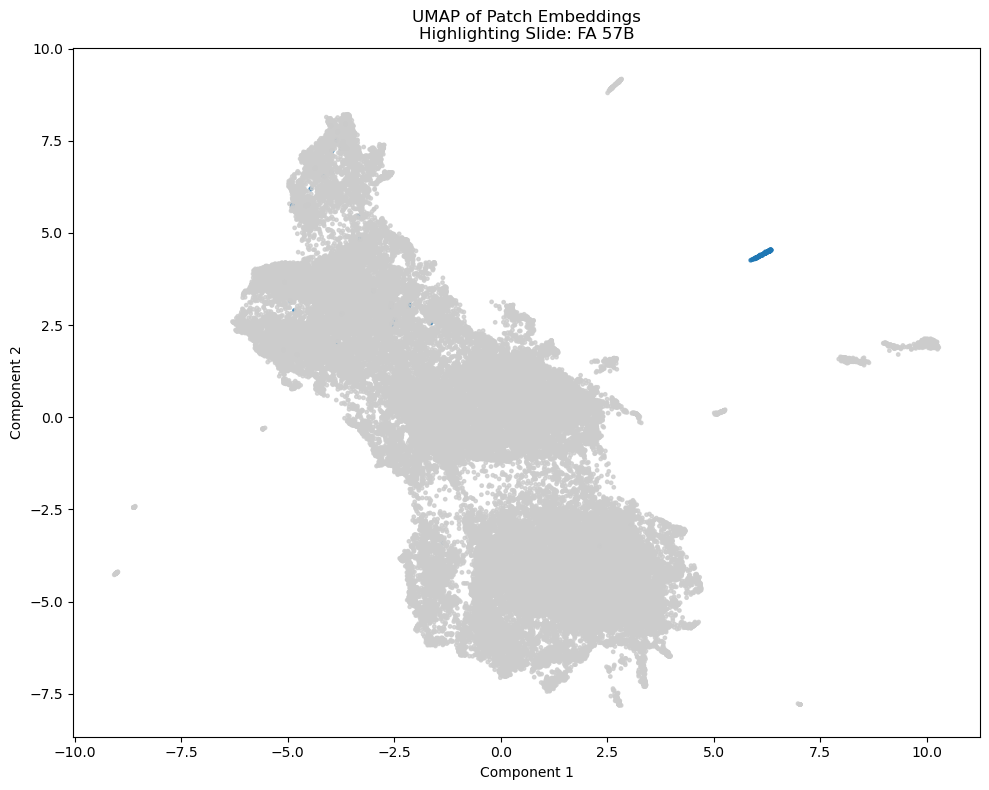

In [29]:
# -----------------------------
# Highlight only one slide
# -----------------------------
highlight_slide_id = 'FA 57B'  # 👈 Set the slide you want to highlight

colors = []
for sid in slide_ids:
    if sid == highlight_slide_id:
        colors.append((0.121, 0.466, 0.705))  # Blue (from matplotlib default palette)
    else:
        colors.append((0.8, 0.8, 0.8))  # Light gray

# Plot
plt.figure(figsize=(10, 8))
plt.scatter(features_2d[:, 0], features_2d[:, 1], c=colors, s=6, alpha=0.8)
plt.title(f"UMAP of Patch Embeddings\nHighlighting Slide: {highlight_slide_id}")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.tight_layout()
plt.show()



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assign each slide a unique color (ensure slide_ids matches features_2d)
unique_slides = np.unique(slide_ids)
palette = sns.color_palette("husl", len(unique_slides))
slide_to_color = {sid: palette[i] for i, sid in enumerate(unique_slides)}
colors = [slide_to_color[sid] for sid in slide_ids]  # slide_ids must match features_2d

plt.figure(figsize=(10, 8))
plt.scatter(features_2d[:, 0], features_2d[:, 1], c=colors[:features_2d.shape[0]], s=5, alpha=0.7)

# Optional: create a legend with slide IDs
for sid in unique_slides:
    plt.scatter([], [], c=slide_to_color[sid], label=sid)
plt.legend(markerscale=2, bbox_to_anchor=(1.05, 1), loc='upper left', title="Slide ID")
plt.title("t-SNE of Patch Embeddings Colored by Slide")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.tight_layout()
plt.show()


inspecting saved checkpoint

In [8]:
import torch

ckpt_path = r'C:\Users\Vivian\Documents\PANTHER\PANTHER\src\results\fa_vs_pt\k=0\FA_PT_panther\FA_PT_panther--25-07-04-18-49-12\s_checkpoint.pth'
ckpt = torch.load(ckpt_path, map_location='cpu')

print("Checkpoint keys:", ckpt.keys())


Checkpoint keys: odict_keys(['classifier.weight'])


In [9]:
weights = ckpt['classifier.weight']  # shape: (num_classes, embedding_dim)
print(weights.shape)
print(weights)


torch.Size([2, 32784])
tensor([[ 0.1384,  0.1338,  0.0446,  ..., -0.0365,  0.0426,  0.0014],
        [-0.1361, -0.1312, -0.0479,  ...,  0.0411, -0.0494,  0.0080]])


In [10]:
weight_diff = (weights[1] - weights[0]).numpy()
top_indices = weight_diff.argsort()[::-1][:10]  # Top 10 contributing to class 1

print("Top features pushing toward class 1 (PT):", top_indices)
print("Weight differences:", weight_diff[top_indices])


Top features pushing toward class 1 (PT): [ 3404  6943  8976  5955  6794 12844 10796  1486   990  9553]
Weight differences: [0.87372994 0.7926564  0.7910558  0.76787454 0.7532082  0.7277756
 0.7171515  0.70674217 0.70528823 0.7041961 ]


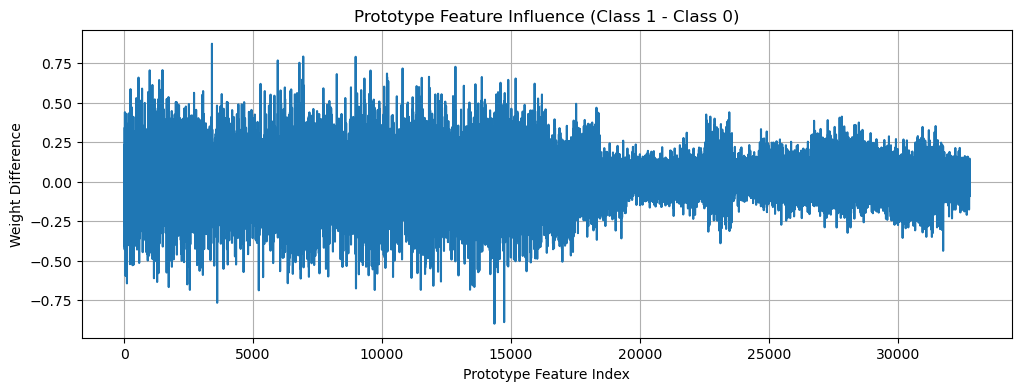

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.plot(weight_diff)
plt.title("Prototype Feature Influence (Class 1 - Class 0)")
plt.xlabel("Prototype Feature Index")
plt.ylabel("Weight Difference")
plt.grid(True)
plt.show()


filter out annotated patches from h5/pt files

In [16]:
import os
import pandas as pd
import numpy as np
import h5py
import re
from tqdm import tqdm

def extract_coords_from_filename(patch_filename):
    match = re.search(r'_x(\d+)_y(\d+)', patch_filename)
    if match:
        return int(match.group(1)), int(match.group(2))
    else:
        return None, None

def regenerate_filtered_h5_files(features_dir, filtered_csv_path, output_dir):
    os.makedirs(output_dir, exist_ok=True)

    # Read and parse filtered test patches CSV
    df = pd.read_csv(filtered_csv_path)

    # Extract coords and group by slide
    df['coord'] = df['patch_file'].apply(lambda fname: extract_coords_from_filename(fname))
    grouped = df.groupby('slide_name')

    for slide_name, group in tqdm(grouped):
        h5_path = os.path.join(features_dir, f"{slide_name}.h5")
        if not os.path.exists(h5_path):
            print(f"⚠️ H5 file not found for {slide_name}")
            continue

        coords_to_keep = set(group['coord'])

        with h5py.File(h5_path, "r") as f:
            coords = f["coords"][:]  # shape (N, 2)
            features = f["features"][:]  # shape (N, D)

        # Convert coords to tuples for set comparison
        coords_tuples = [tuple(row) for row in coords]

        # Filter indices to keep
        keep_indices = [i for i, coord in enumerate(coords_tuples) if coord in coords_to_keep]

        if not keep_indices:
            print(f"⚠️ No matching coordinates found for {slide_name}")
            continue

        filtered_coords = coords[keep_indices]
        filtered_features = features[keep_indices]

        # Save new filtered h5 file
        output_path = os.path.join(output_dir, f"{slide_name}.h5")
        with h5py.File(output_path, "w") as f_out:
            f_out.create_dataset("coords", data=filtered_coords)
            f_out.create_dataset("features", data=filtered_features)

        print(f"✅ Saved filtered features for {slide_name} to: {output_path}")


In [ ]:
regenerate_filtered_h5_files(
    features_dir=r"C:\Users\Vivian\Documents\PANTHER\PANTHER\features\uniextracted_mag5x_patch224_fp\feats_h5",
    filtered_csv_path=r"C:\Users\Vivian\Documents\CONCH\metadata\patient_split_annotate\patch_csv_5x\test_patches_ann_filtered.csv",
    output_dir=r"C:\Users\Vivian\Documents\PANTHER\PANTHER\features\uni_filtered_mag5x_patch224_fp\feats_h5"
)


In [20]:
import os
import shutil

def copy_remaining_h5_files(features_dir, filtered_csv_path, output_dir):
    """
    Copies all .h5 files from features_dir to output_dir if they are not in the test slides listed in the filtered CSV.
    Skips files that already exist in the output directory.
    """
    # Load filtered CSV and get list of test slide names
    df = pd.read_csv(filtered_csv_path)
    test_slides = set(df['slide_name'].unique())

    os.makedirs(output_dir, exist_ok=True)

    for fname in os.listdir(features_dir):
        if not fname.endswith(".h5"):
            continue

        slide_name = os.path.splitext(fname)[0]
        src = os.path.join(features_dir, fname)
        dst = os.path.join(output_dir, fname)

        # Only copy if not part of test slides AND not already copied
        if slide_name not in test_slides and not os.path.exists(dst):
            shutil.copy2(src, dst)
            print(f"✅ Copied: {slide_name}")
        else:
            print(f"⏭️ Skipped: {slide_name} (test slide or already exists)")


In [ ]:
copy_remaining_h5_files(
    features_dir=r"C:\Users\Vivian\Documents\PANTHER\PANTHER\features\uniextracted_mag5x_patch224_fp\feats_h5",
    filtered_csv_path=r"C:\Users\Vivian\Documents\CONCH\metadata\patient_split_annotate\patch_csv_5x\test_patches_ann_filtered.csv",
    output_dir=r"C:\Users\Vivian\Documents\PANTHER\PANTHER\features\uni_filtered_mag5x_patch224_fp\feats_h5"
)


generate pt files from h5

In [ ]:
import os
import h5py
import torch

# Path to your input .h5 files and desired output directory
input_h5_dir = r'C:\Users\Vivian\Documents\PANTHER\PANTHER\features\unifiltered_mag5x_patch224_fp\feats_h5'
output_pt_dir = r'C:\Users\Vivian\Documents\PANTHER\PANTHER\features\unifiltered_mag5x_patch224_fp\feats_pt'
os.makedirs(output_pt_dir, exist_ok=True)

# Loop through each HDF5 file
for fname in os.listdir(input_h5_dir):
    if not fname.endswith('.h5'):
        continue

    h5_path = os.path.join(input_h5_dir, fname)
    pt_path = os.path.join(output_pt_dir, fname.replace('.h5', '.pt'))

    with h5py.File(h5_path, 'r') as f:
        if 'features' in f:
            features = torch.tensor(f['features'][:])  # Convert to tensor
            torch.save(features, pt_path)
            print(f"✅ Saved: {pt_path}")
        else:
            print(f"⚠️ Skipping {fname}: 'features' key not found.")
